# EDA (Exploratory Data Analysis)
다양한 각도에서 데이터를 관찰하고 이해하는 과정입니다. 데이터의 이해도가 높아지면서 숨겨진 의미를 발견하고 잠재적인 문제를 미리 발견할 수 있습니다. 이를 바탕으로 데이터를 보완하거나 기존의 가설을 수정할 수 있습니다. 

<div class="alert alert-block alert-success">
    <b>목표</b> : 주택가격과 관련 있는 Factor를 찾는다. 
</div>

데이터를 1) 전처리한 후 분포를 2) 시각화하고 3) 다양한 기준으로 주택 가격을 분석해 보세요.
- 데이터를 분류한 근거를 글로 남겨주세요.

In [ ]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

데이터 살펴보기

In [ ]:
#gogle코랩 연동
from google.colab import drive 
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/BostonHousing.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT. MEDV
0,0.01,18.00,2.31,0,0.54,6.58,65.20,4.09,1,296,15.30,396.90,4.98,24.00,0
1,0.03,0.00,7.07,0,0.47,6.42,78.90,4.97,2,242,17.80,396.90,9.14,21.60,0
2,0.03,0.00,7.07,0,0.47,7.18,61.10,4.97,2,242,17.80,392.83,4.03,34.70,1
3,0.03,0.00,2.18,0,0.46,7.00,45.80,6.06,3,222,18.70,394.63,2.94,33.40,1
4,0.07,0.00,2.18,0,0.46,7.15,54.20,6.06,3,222,18.70,396.90,5.33,36.20,1


### 타겟 라벨 확인


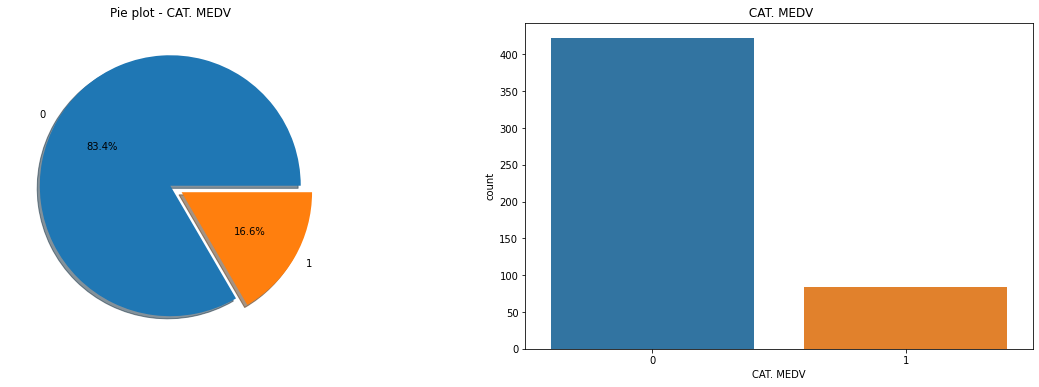

In [ ]:

f, ax = plt.subplots(1, 2, figsize=(20, 6))

df['CAT. MEDV'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Pie plot - CAT. MEDV')
ax[0].set_ylabel('')
sns.countplot('CAT. MEDV', data=df, ax=ax[1])
ax[1].set_title(' CAT. MEDV')

plt.show()

| 변수 | 설명 |
| ---- | ---- |
| CRIM | 1인당 범죄율 | 
| ZN | 25,000 평방피트를 초과하는 거주지역의 비율 | 
| INDUS | 비소매상업지역 면적 비율 |
| CHAS | 찰스강의 경계에 위치한 경우 1, 아니면 0 |
| NOX | 일산화질소 농도 | 
| RM | 방의 수 |
| AGE | 1940년 이전에 건축된 주택의 비율 |
| DIS | 직업센터까지의 접근성 지수 |
| RAD | 고속도로까지의 접근성 지수 |
| TAX | 재산세율 | 
| PTRATIO | 학생-교사 비율 |
| B | 흑인 비율 |
| LSTAT | 하위 계층 비율 | 
| MEDV | 본인 소유의 주택 가격 (중앙값), 단위 1,000$ |
| CAT.MEDV | MEDV가 30,000을 넘으면 1 아니면 0 |

## 데이터 타입과 결측값 확인하기

In [ ]:
#데이터 타입
df.dtypes
#int와 float가 섞여있어서 나중에 문제가 크게 생기지는 않겠지만 그래도 바꾸겠습니다.

CRIM         float64
ZN           float64
INDUS        float64
CHAS           int64
NOX          float64
RM           float64
AGE          float64
DIS          float64
RAD            int64
TAX            int64
PTRATIO      float64
B            float64
LSTAT        float64
MEDV         float64
CAT. MEDV      int64
dtype: object

In [ ]:
#df.astype('int')
#이러한 이유로 int로 바꾸진 않을겁니다.

In [ ]:
#float형으로 바꾸겠습니다.

data = df.astype('float')
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT. MEDV
0,0.01,18.00,2.31,0.00,0.54,6.58,65.20,4.09,1.00,296.00,15.30,396.90,4.98,24.00,0.00
1,0.03,0.00,7.07,0.00,0.47,6.42,78.90,4.97,2.00,242.00,17.80,396.90,9.14,21.60,0.00
2,0.03,0.00,7.07,0.00,0.47,7.18,61.10,4.97,2.00,242.00,17.80,392.83,4.03,34.70,1.00
3,0.03,0.00,2.18,0.00,0.46,7.00,45.80,6.06,3.00,222.00,18.70,394.63,2.94,33.40,1.00
4,0.07,0.00,2.18,0.00,0.46,7.15,54.20,6.06,3.00,222.00,18.70,396.90,5.33,36.20,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06,0.00,11.93,0.00,0.57,6.59,69.10,2.48,1.00,273.00,21.00,391.99,9.67,22.40,0.00
502,0.05,0.00,11.93,0.00,0.57,6.12,76.70,2.29,1.00,273.00,21.00,396.90,9.08,20.60,0.00
503,0.06,0.00,11.93,0.00,0.57,6.98,91.00,2.17,1.00,273.00,21.00,396.90,5.64,23.90,0.00
504,0.11,0.00,11.93,0.00,0.57,6.79,89.30,2.39,1.00,273.00,21.00,393.45,6.48,22.00,0.00


In [ ]:
#잘 바뀌었나 확인해보겠습니다.

data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT. MEDV
0,0.01,18.00,2.31,0.00,0.54,6.58,65.20,4.09,1.00,296.00,15.30,396.90,4.98,24.00,0.00
1,0.03,0.00,7.07,0.00,0.47,6.42,78.90,4.97,2.00,242.00,17.80,396.90,9.14,21.60,0.00
2,0.03,0.00,7.07,0.00,0.47,7.18,61.10,4.97,2.00,242.00,17.80,392.83,4.03,34.70,1.00
3,0.03,0.00,2.18,0.00,0.46,7.00,45.80,6.06,3.00,222.00,18.70,394.63,2.94,33.40,1.00
4,0.07,0.00,2.18,0.00,0.46,7.15,54.20,6.06,3.00,222.00,18.70,396.90,5.33,36.20,1.00


In [ ]:
#결측치 확인
data.isna().sum()

CRIM         0
ZN           0
INDUS        0
CHAS         0
NOX          0
RM           0
AGE          0
DIS          0
RAD          0
TAX          0
PTRATIO      0
B            0
LSTAT        0
MEDV         0
CAT. MEDV    0
dtype: int64

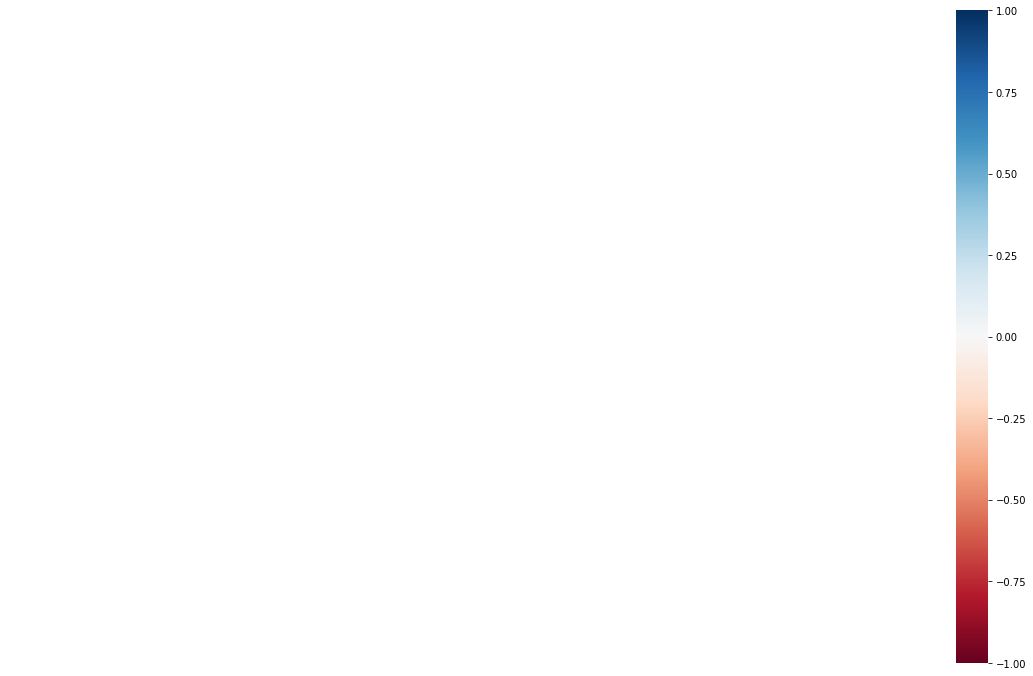

In [ ]:
#그래프로도 한 번 그려보죠
import missingno as msno

msno.heatmap(data)
#깔끔하게 없군요

#### 아래처럼 나오면 있다는 이야기입니다.

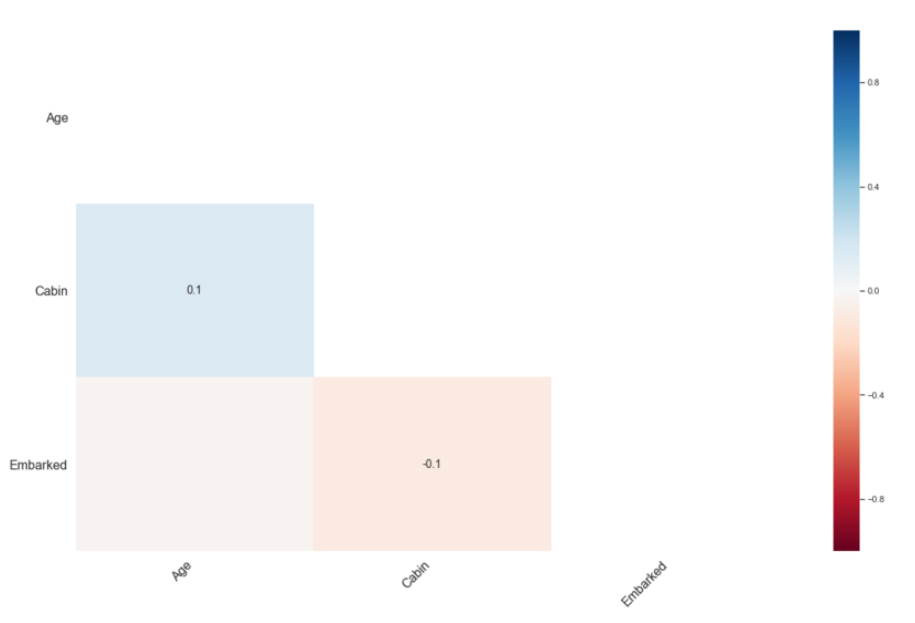

## 데이터 분포 확인하기

In [ ]:
#데이터 통계값들을 측정해볼게요

data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT. MEDV
count,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,3.61,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,356.67,12.65,22.53,0.17
std,8.60,23.32,6.86,0.25,0.12,0.70,28.15,2.11,8.71,168.54,2.16,91.29,7.14,9.20,0.37
min,0.01,0.00,0.46,0.00,0.39,3.56,2.90,1.13,1.00,187.00,12.60,0.32,1.73,5.00,0.00
25%,0.08,0.00,5.19,0.00,0.45,5.89,45.02,2.10,4.00,279.00,17.40,375.38,6.95,17.02,0.00
50%,0.26,0.00,9.69,0.00,0.54,6.21,77.50,3.21,5.00,330.00,19.05,391.44,11.36,21.20,0.00
75%,3.68,12.50,18.10,0.00,0.62,6.62,94.07,5.19,24.00,666.00,20.20,396.23,16.96,25.00,0.00
max,88.98,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,396.90,37.97,50.00,1.00


In [ ]:
data.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT. MEDV
CRIM,1.00,-0.20,0.41,-0.06,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,-0.39,0.46,-0.39,-0.15
ZN,-0.20,1.00,-0.53,-0.04,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,0.18,-0.41,0.36,0.37
INDUS,0.41,-0.53,1.00,0.06,0.76,-0.39,0.64,-0.71,0.60,0.72,0.38,-0.36,0.60,-0.48,-0.37
CHAS,-0.06,-0.04,0.06,1.00,0.09,0.09,0.09,-0.10,-0.01,-0.04,-0.12,0.05,-0.05,0.18,0.11
NOX,0.42,-0.52,0.76,0.09,1.00,-0.30,0.73,-0.77,0.61,0.67,0.19,-0.38,0.59,-0.43,-0.23
RM,-0.22,0.31,-0.39,0.09,-0.30,1.00,-0.24,0.21,-0.21,-0.29,-0.36,0.13,-0.61,0.70,0.64
AGE,0.35,-0.57,0.64,0.09,0.73,-0.24,1.00,-0.75,0.46,0.51,0.26,-0.27,0.60,-0.38,-0.19
DIS,-0.38,0.66,-0.71,-0.10,-0.77,0.21,-0.75,1.00,-0.49,-0.53,-0.23,0.29,-0.50,0.25,0.12
RAD,0.63,-0.31,0.60,-0.01,0.61,-0.21,0.46,-0.49,1.00,0.91,0.46,-0.44,0.49,-0.38,-0.20
TAX,0.58,-0.31,0.72,-0.04,0.67,-0.29,0.51,-0.53,0.91,1.00,0.46,-0.44,0.54,-0.47,-0.27


In [ ]:
#log로 해보았습니다.
data1 = np.log1p(data1)
data1

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT. MEDV
0,0.01,1.37,0.79,0.00,0.36,1.11,1.65,0.97,0.53,1.90,1.33,1.94,1.03,1.44,0.00
1,0.03,0.00,1.13,0.00,0.33,1.10,1.68,1.02,0.74,1.87,1.37,1.94,1.20,1.42,0.00
2,0.03,0.00,1.13,0.00,0.33,1.13,1.63,1.02,0.74,1.87,1.37,1.94,0.96,1.52,0.53
3,0.03,0.00,0.77,0.00,0.32,1.12,1.58,1.08,0.87,1.86,1.38,1.94,0.86,1.51,0.53
4,0.06,0.00,0.77,0.00,0.32,1.13,1.61,1.08,0.87,1.86,1.38,1.94,1.05,1.53,0.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06,0.00,1.27,0.00,0.37,1.11,1.66,0.81,0.53,1.89,1.41,1.94,1.21,1.42,0.00
502,0.04,0.00,1.27,0.00,0.37,1.09,1.68,0.78,0.53,1.89,1.41,1.94,1.20,1.40,0.00
503,0.06,0.00,1.27,0.00,0.37,1.12,1.71,0.77,0.53,1.89,1.41,1.94,1.06,1.44,0.00
504,0.10,0.00,1.27,0.00,0.37,1.12,1.71,0.80,0.53,1.89,1.41,1.94,1.10,1.42,0.00


In [ ]:
# 특성들 사이의 상관관계 찾기
corr = data.corr()
corr.shape

(15, 15)

주택가격 (`MEDV`)과 관련 있는 Factor를 찾아보세요
- 대형 평수 vs 소형 평슈
- 노후화 정도와 집값의 관계는?
- 직주근접?


### 주택 가격에 대한 정리

In [ ]:
#가격 설정 및 특성을 바인딩하겠습니다.

prices = data['MEDV']
features = data.drop('MEDV', axis=1)

print("보스턴 주택 데이터: {} 데이터 그리고 {}변수가 있습니다.".format(*data.shape))

보스턴 주택 데이터: 506 데이터 그리고 15변수가 있습니다.


In [ ]:
df['MEDV'].nunique()
#당연히 동일 집값이 이겠죠!!

229

가격의 최대,최소 그리고 평균과 중앙값을 구해서 가격의 분포도를 살피겠습니다


In [ ]:
#최댓값

maximum_price = np.amax(prices)

#최솟값

minimum_price = np.amin(prices)

#평균

mean_price = np.mean(prices)

#중앙

median_price = np.median(prices)
#Std
std_price = np.std(prices)

#위의 결과 값

print("Statistics for Boston housing  dataset:\n")
print("Maximum price: ${}".format(maximum_price))
print("Minimum price: ${}".format(minimum_price))
print("Mean price: ${}".format(mean_price))
print("Median price ${}".format(median_price))
print("Standard devlation of prices: ${}".format(std_price))



Statistics for Boston housing  dataset:

Maximum price: $50.0
Minimum price: $5.0
Mean price: $22.532806324110698
Median price $21.2
Standard devlation of prices: $9.188011545278206


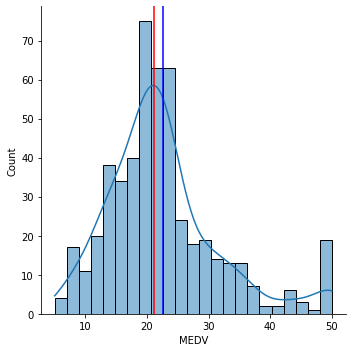

In [ ]:
## SalePrice의 확률밀도함수를 그려보겠습니다
sns.displot(df['MEDV'], kde=True)

## 평균과, 중간값으로 수직선을 그려보겠습니다.
plt.axvline(df['MEDV'].mean(), color='blue')
plt.axvline(df['MEDV'].median(), color='red')

중앙값과 평균값의 차이가 별로 없는 것으로 보아서는 결측치 뿐만 아니라 이상치도 없는 데이터 같군요


### 가설 설정

1. 평당 미터가 넓을 수록 집 값이 비쌀 것이다

2. 주택이 오래될 수록 잡 값이 싸질 것이다

3. 직장과 가까우면 집 값이 높아질 거다


### 대형 평수 vs 소형 평수

ZN	25,000 평방피트를 초과하는 거주지역의 비율

In [ ]:
size1 = data['ZN']
features = data.drop('ZN', axis=1)

print("보스턴 주택 평수 데이터: {} 데이터 그리고 {}변수가 있습니다.".format(*data.shape))

보스턴 주택 평수 데이터: 506 데이터 그리고 15변수가 있습니다.


In [ ]:
df['ZN'].nunique()
#당연히 동일 평수 있겠죠!!

26

In [ ]:
#최댓값

maximum_size1 = np.amax(size1)

#최솟값

minimum_size1 = np.amin(size1)

#평균

mean_size1 = np.mean(size1)

#중앙

median_size1 = np.median(size1)
#Std
std_size1 = np.std(size1)

#위의 결과 값

print("Statistics for Boston housing  dataset:\n")
print("Maximum size1: {} m^3".format(maximum_size1))
print("Minimum size1: {} m^3".format(minimum_size1))
print("Mean size1: {} m^3".format(mean_size1))
print("Median size1 {} m^3".format(median_size1))
print("Standard devlation of size1: {} m^3".format(std_size1))


Statistics for Boston housing  dataset:

Maximum size1: 100.0 m^3
Minimum size1: 0.0 m^3
Mean size1: 11.363636363636363 m^3
Median size1 0.0 m^3
Standard devlation of size1: 23.299395694766027 m^3


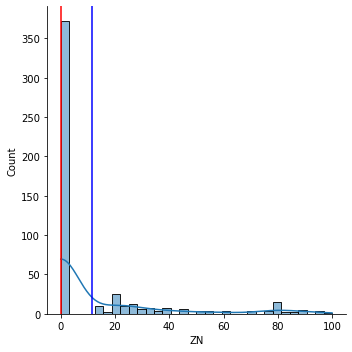

In [ ]:
## Size1의 확률밀도함수를 그려보겠습니다
sns.displot(df['ZN'], kde=True)

## 평균과, 중간값으로 수직선을 그려보겠습니다.
plt.axvline(df['ZN'].mean(), color='blue')
plt.axvline(df['ZN'].median(), color='red')

한 쪽에만 몰려있는 데이터이군요... 25,OOO 평방 피트를 초과하는 지역이 대체로 없다고 볼 수 있겠네요.



In [ ]:
import numpy as np

how = {
    'MEDV': np.mean
}

df.groupby('ZN').agg( how )

,MEDV
ZN,
0.00,20.47
12.50,20.13
17.50,33.00
18.00,24.00
20.00,35.47
21.00,22.15
22.00,25.32
25.00,22.44
28.00,22.83


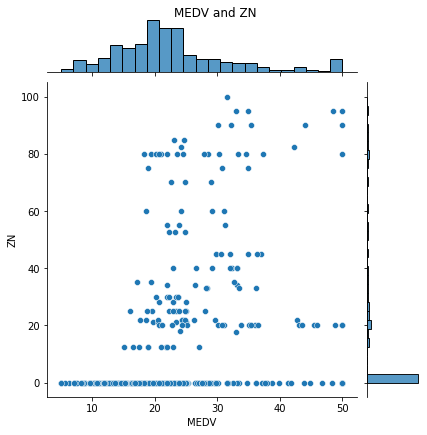

In [ ]:
sns.jointplot(x="MEDV", y="ZN", data=data)
plt.suptitle("MEDV and ZN", y=1)
plt.show()

In [ ]:
from scipy import stats
x = data["MEDV"]
y = data["ZN"]
stats.pearsonr(x,y)

(0.36044534245054316, 5.713584153079442e-17)

#### 대형 평수 소형 평수, 그리고 집값

데이터: ZN, MEDV

일단 이 데이터는 최대 최소의 차이가 너무 커서 평균이 제대로된 기준 되지 못했고 무엇이 소형이고 대형인지 객관적인 기준을 잡지 못했습니다.

그러나 일단 평수와 가격 데이터를 비교하면, 평수가 클수록 더 주택의 가격이 오르는 건 맞지만 그것이 곧 100% 통하는 건 아닌 것 같습니다.

<br>

왜냐하면, 그래프를 보시면 MEDV의 평균 가격 구간을 기준으로 왼쪽은 평수가 작으니 값이 싼 곳 오른쪽은 평수가 크니 값이 비싸다라는 단순 이분법적으로 나누면 평수 데이터가 가격에 영향을 미친다고 볼 수 있습니다.

<br>

허나 위에서 말한 것처럼 너무나 크게 몰려있는 이상치로 인해서 올바른 판단을 하지 못합니다.

즉, 평수~집값의 양의 상관관계를 이야기하기엔 좀 어렵지 않나 싶습니다.

아마 그러한 이유로 상관관계 수치도 0.36%라는 낮은 수치와 p-value값이 높게 나온 것 같습니다.

고로, 이것은 영향을 끼치지 못한다가 저의 결론입니다.



### 노후된 집과 가격과의 관계

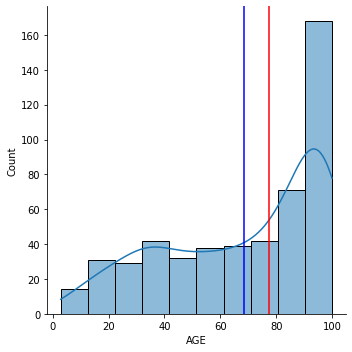

In [ ]:
## 나이의 확률밀도함수를 그려보겠습니다
sns.displot(df['AGE'], kde=True)

## 평균과, 중간값으로 수직선을 그려보겠습니다.
plt.axvline(df['AGE'].mean(), color='blue')
plt.axvline(df['AGE'].median(), color='red')

평균적으로 70년 정도 되었고, 중앙값은 75년 이상인 걸로 보입니다.

데이터가 100년의 근접한 주택들이 많은 것으로 보입니다.

In [ ]:
import numpy as np

how = {
    'MEDV': np.mean
}

df.groupby('AGE').agg( how )

,MEDV
AGE,
2.90,26.60
6.00,24.10
6.20,23.40
6.50,24.70
6.60,24.75
...,...
98.80,14.50
98.90,13.07
99.10,10.90


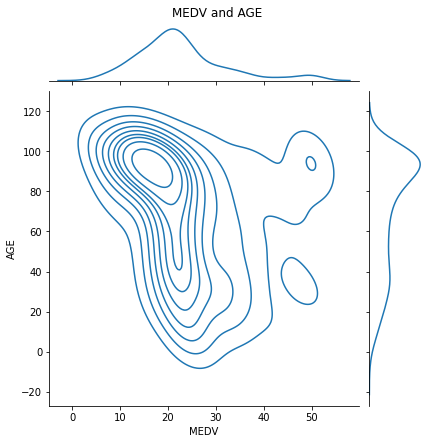

In [ ]:
sns.jointplot(x="MEDV", y="AGE", data=data, kind="kde")
plt.suptitle("MEDV and AGE", y=1.02)
plt.show()

In [ ]:
from scipy import stats
x = data["MEDV"]
y = data["AGE"]
stats.pearsonr(x,y)

(-0.3769545650045963, 1.5699822091877261e-18)

### 노후와의 정도 와 집값 관계

데이터: AGE, MEDV

기본적으로 사람은 신축 건물일수록 좋아하고 그에 맞게 가격 또한 비싼 것을 알 수 있습니다. 그래서 그런지 평균보다 낮은 가격들은 주로 주택이 오래된 것들이 주를 이루는 것 같습니다.

물론 간혹, 주택 가격이 높고 주택도 오랴된 경우도 있지만 보통 이 경우는 교통편이나 방의 개수 같은 부차적인 원인들이 있기에 증가했다고 추측이 됩니다.

즉, 정리하자면 노후와의 정도와 집 값의 관계는 전형적인 음의 상관관계를 띄는 형태이므로 
둘의 상관관계는 그래프와 피어슨 상관계수를 통해서 어느정도 관련성이 있다고 판단이 됩니다.



### 직주 근접과 주택 가격과의 관계

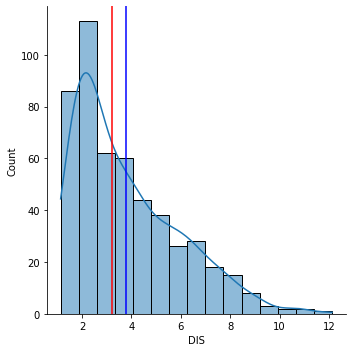

In [ ]:
## 직주근접의 확률밀도함수를 그려보겠습니다
sns.displot(df['DIS'], kde=True)

## 평균과, 중간값으로 수직선을 그려보겠습니다.
plt.axvline(df['DIS'].mean(), color='blue')
plt.axvline(df['DIS'].median(), color='red')

In [ ]:
import numpy as np

how = {
    'MEDV': np.mean
}

df.groupby('DIS').agg( how )

,MEDV
DIS,
1.13,50.00
1.14,13.80
1.17,50.00
1.17,13.80
1.18,11.90
...,...
9.22,21.40
9.22,33.00
10.59,19.40


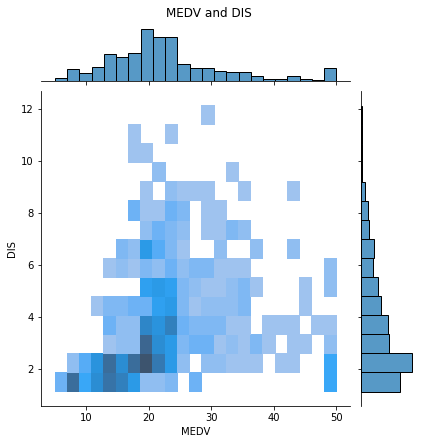

In [ ]:
sns.jointplot(x="MEDV", y="DIS", data=data, kind="hist")
plt.suptitle("MEDV and DIS", y=1.02)
plt.show()

색깔이 진할 수록 많이 분포되어 있음을 의미합니다.

In [ ]:
from scipy import stats
x = data["MEDV"]
y = data["DIS"]
stats.pearsonr(x,y)

(0.2499287340859039, 1.2066117273368017e-08)

### 직주근접과 주택가격 관계

단순하게 직장과 가까운 주택 가격이 높을 수 있다고 생각을 할 순 있습니다.

허나 실제로 보면 거리가 가까울 수록 가격이 낮은 경우가 더 많습니다.

그 이유는 모두가 같은 지역에 직장을 갖고 있지 않습니다. 당연히 다양한 지역에서 일을 할텐데 그 모든 직장 지역과 이 집과의 거리를 계산해서 통계를 내는 게 주택 가격에 유의미한 결과를 내진 못한 것 같습니다.

## 가설 확인 정리

1. 평수에 따라서 가격 차이는 있지만 양의 상관 관계를 띄진 않으므로 유의미하진 않다.

2. 노후된 주택과 주택 가격은 큰 연광성이 있다

3. 직장과 거리가 가까울수록 좋긴 하겠지만 모든 사람이 같은 지역에서 일을 하는 게 아니므로 너무 광범위한 범위 설정이다.

### 집 값 예측

집 값에 영향을 줄 수 있는 것들은 무엇이 있을까요?

데이터 분석 시 유의미한 것이 뭐가 있을지 예측하여 찾아보도록 하겠습니다. 당연히, 아래 분석을 진행하다보면 바뀔 수 있습니다.

TOP4를 잡았습니다.

1. CRIM :1인당 범죄율이 높을 수록 집 값은 낮아지나(X)

논리적으로는 그럴 수 있지만 이 데이터에선 범죄율이 극히 낮기에 판단 불가

2. AGE: 주택 나이(건설 시기) 많을 수록 집 값은 낮아진다(0)

노후 주택일수록 시설관리 부분에서 취약하기에 선호도가 낮은 것을 볼 수 있고 그것이 가격과 직결합니다.

3. RAD: 교통편이 좋을 수록 비싸다(O)

고르게 분포가 되어있고 이건 주택을 처음 설계할 도로공사의 마음이라 참 어렵네요.

무튼, 애시당초 교통편이 괜찮은 곳에 집을 설계했기에 조금 애매한 감이 있지만 확실한 것은 교통이 안 좋게되면 주택 가격은 평균 이하로 떨어지는 것은 맞는 것 같습니다.

4. RM: 방의 수가 많을 수록 값이 커진다(O)

방이 많을수록 가용범위가 넓기에 선호도가 높다는 객관적인 사실을 증명하는 것 같습니다.

<br>

위와 같이 잡은 이유는 저희가 항상 집을 고르는 1선정 기준이 치안, 낙후되지 않은 시설, 교통시설 ,,방의 수이라고 생각해서 골랐습니다.

기준표를 마친 후에 추가적으로 해보겠습니다.

위의 내용, 아래 내용과 겹치는 부분인 AGE와 RM은 빼고 하겠습니다.

### CRIM

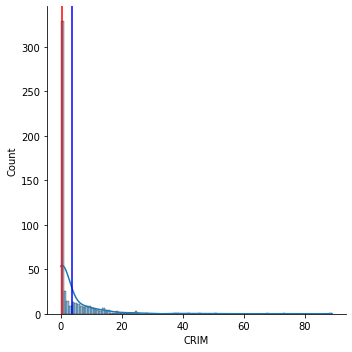

In [ ]:
## 직주근접의 확률밀도함수를 그려보겠습니다
sns.displot(df['CRIM'], kde=True)

## 평균과, 중간값으로 수직선을 그려보겠습니다.
plt.axvline(df['CRIM'].mean(), color='blue')
plt.axvline(df['CRIM'].median(), color='red')

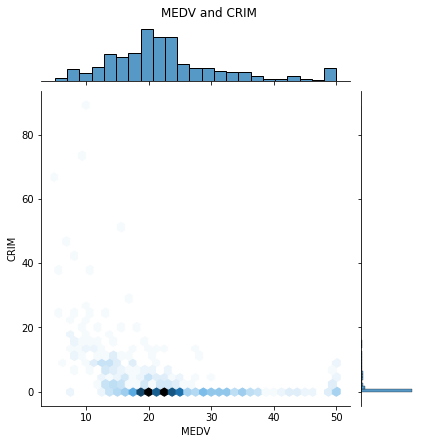

In [ ]:
sns.jointplot(x="MEDV", y="CRIM", data=data, kind="hex")
plt.suptitle("MEDV and CRIM", y=1.02)
plt.show()

### RAD


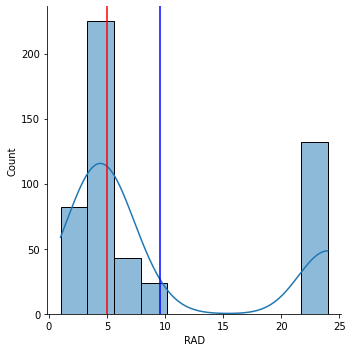

In [ ]:
## 교통편의 확률밀도함수를 그려보겠습니다
sns.displot(df['RAD'], kde=True)

## 평균과, 중간값으로 수직선을 그려보겠습니다.
plt.axvline(df['RAD'].mean(), color='blue')
plt.axvline(df['RAD'].median(), color='red')

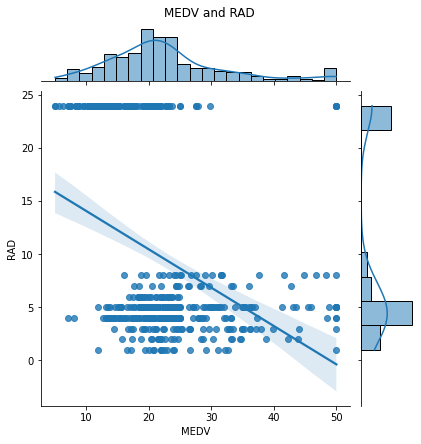

In [ ]:
sns.jointplot(x="MEDV", y="RAD", data=data, kind="reg")
plt.suptitle("MEDV and RAD", y=1.02)
plt.show()

## 주탁 가격과 다른 컬럼의 상관관계가 궁금해졌습니다

In [ ]:
# MEDV에 대한 CORR
corr_data = df.corr()['MEDV']
corr_data

CRIM        -0.39
ZN           0.36
INDUS       -0.48
CHAS         0.18
NOX         -0.43
RM           0.70
AGE         -0.38
DIS          0.25
RAD         -0.38
TAX         -0.47
PTRATIO     -0.51
B            0.33
LSTAT       -0.74
MEDV         1.00
CAT. MEDV    0.79
Name: MEDV, dtype: float64

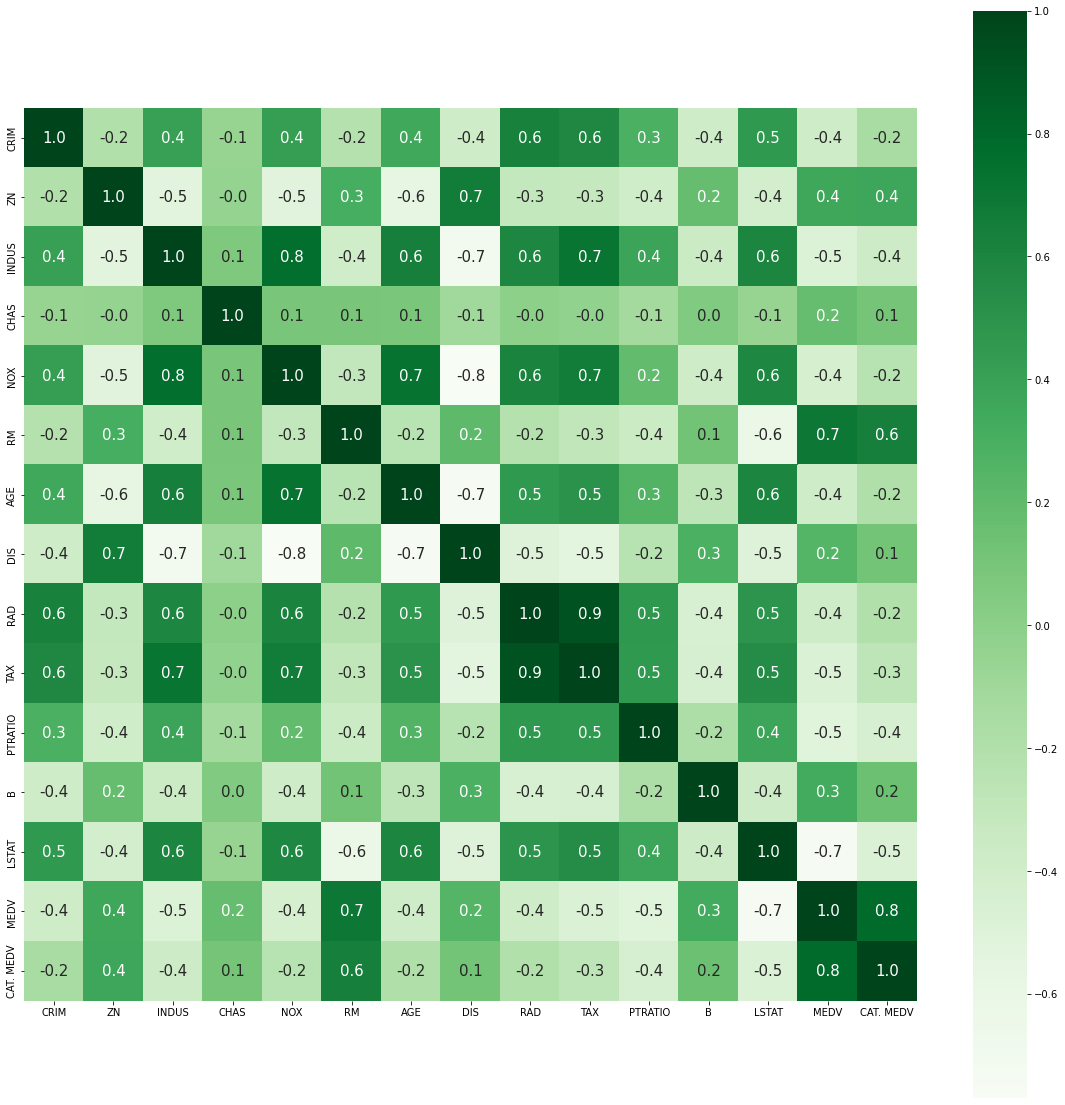

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, 
            annot_kws={'size':15}, cmap='Greens')

In [ ]:
#음과 양이 섞여있으므로 절댓값으로 정리하겠습니다.

# 절대값을 씌우고 정렬
sorted_corr_data = corr_data.abs().sort_values(ascending=False)
sorted_corr_data

MEDV        1.00
CAT. MEDV   0.79
LSTAT       0.74
RM          0.70
PTRATIO     0.51
INDUS       0.48
TAX         0.47
NOX         0.43
CRIM        0.39
RAD         0.38
AGE         0.38
ZN          0.36
B           0.33
DIS         0.25
CHAS        0.18
Name: MEDV, dtype: float64

### 제일 높은 상관관계

TOP1 : RM - 방의 개수

TOP2: LSTAT - 하위계층

TOP3: PTRATIO - 학생-교사비율


실험은 하지 않았지만 상관관계가 높기에 가장 주택 가격에 영향을 끼치는 요인이라고 할 수 있습니다.

<br>
이러한 결과가 나온 이유는 근본적으로 방의 개수가 많다는 것은 가용범위가 넓기 때문에 선호도가 높아서 주택 가격에 영향을 주는 것 같습니다.

그리고, LSTAT같은 경우는 미국의 기준으로 하위계층이 많을 수록 살인, 마약, 등 치안을 괴롭히는 강력 범죄가 많기 때문에 비율이 높을 수록 당연히 가격은 낮아질 것입니다.

위의 범죄율(CRIM)은 세분화가 되어있지 않습니다. 단순 교통사고도 범죄라고 치부할 수 있을 정도로 카테고리화가 안되었기에 유의마한 지표가 되지 못한 것 같습니다.

끝으로, 학생과 교사는 본질적으로 신원을 보장해주는 안정적인 직군이기에 높을수록 선호하는 것 같습니다. 학업 분위기 조성인 것이죠

### 회고

우리가 익히 들은 주택 가격과 관련된 여러 요소들을 비교한 것은 흥미로웟습니다.

그리고, 관용적으로 주택 가격의 증가 감소의 영향을 끼치는 것들이 실제 분석을 통해서 본 결과 비단 그것 하나만이 아니라 여러 데이터의 합집합을 통해서 도출이 되어왔다는 것을 알게 되어서 좋았습니다.

그러나 한 가지 의문이 든건 너무나 전사적으로만 분성을 했기에  p-value값들이 너무 커서 이것이 정말로 상관관계를 분석할 수 있는 데이터와 지표였는지는 고려해봐야할 것 같습니다.


즉, 주택의 가격은 한 가지 데이터만으로 인해서 변경되는 것보단 여러 데이터의 복합적 이유로 된다는 사실을 알게 되어 여러 데이터를 합해서 상관계수를 구하는 방법을 조금 찾아봐야할 것 같습니다.

또한, 데이터에 따라서 객관적인 기준들이 맞지 않을 수 있다는 것을 알게 되어서 좋았습니다.

고로, 객관적 기준보단 데이터에 맞는 기준으로 가설을 설정하면 보다 좋은 설계가 될 수 있기에 데이터가 조금 더 방대해지면 A/B TEST를 도입할 것 같습니다.

객관적 기준을 기반으로 만든 것:A
데이터 기준으로 만든 것:B

이렇게 하여서 데이터를 분석할 것 같습니다.

<div class="alert alert-block alert-success">
<b>채점기준</b> <br>
<ul>
    <li>데이터를 3건이 상의 변수를 분석했는가? </li>
    <li>데이터를 분류한 기준을 논리적으로 정리했는가</li>       
    <li>데이터를 차트로 시각화했는가? </li>
    <li>결과를 분석해서 정리했는가? </li>       
    <li>심도있게 분석했는가? </li>     
</div>

### 여기서부턴 제 취미로 회귀 모델을 만들어 보았습니다

In [ ]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
#gogle코랩 연동
from google.colab import drive 
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [ ]:

data = '/content/gdrive/MyDrive/BostonHousing.csv'
data1 = pd.read_csv('/content/gdrive/MyDrive/BostonHousing.csv')
data1.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT. MEDV
0,0.01,18.00,2.31,0,0.54,6.58,65.20,4.09,1,296,15.30,396.90,4.98,24.00,0
1,0.03,0.00,7.07,0,0.47,6.42,78.90,4.97,2,242,17.80,396.90,9.14,21.60,0
2,0.03,0.00,7.07,0,0.47,7.18,61.10,4.97,2,242,17.80,392.83,4.03,34.70,1
3,0.03,0.00,2.18,0,0.46,7.00,45.80,6.06,3,222,18.70,394.63,2.94,33.40,1
4,0.07,0.00,2.18,0,0.46,7.15,54.20,6.06,3,222,18.70,396.90,5.33,36.20,1


In [ ]:
#!pip install lazypredict

In [ ]:
from lazypredict.Supervised import LazyRegressor
from sklearn import datasets
from sklearn.utils import shuffle
import numpy as np

boston = datasets.load_boston()
X, y = shuffle(boston.data, boston.target, random_state=13)
X = X.astype(np.float32)

offset = int(X.shape[0] * 0.9)

X_train, y_train = X[:offset], y[:offset]
X_test, y_test = X[offset:], y[offset:]

reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

print(models)

100%|██████████| 42/42 [00:03<00:00, 12.33it/s]

                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
SVR                                          0.83       0.88  2.62        0.03
BaggingRegressor                             0.83       0.88  2.63        0.05
NuSVR                                        0.82       0.86  2.76        0.04
RandomForestRegressor                        0.81       0.86  2.78        0.37
XGBRegressor                                 0.81       0.86  2.79        0.09
GradientBoostingRegressor                    0.81       0.86  2.84        0.17
ExtraTreesRegressor                          0.79       0.84  2.98        0.22
AdaBoostRegressor                            0.78       0.83  3.04        0.11
HistGradientBoostingRegressor                0.77       0.83  3.06        0.33
PoissonRegressor                             0.77       0.83  3.11        0.02
LGBMRegressor                                0.77   

## 위의 모델을 쓸 경우 나올 예측입니다. 실제로 한 번 해보겠습니다

In [ ]:
# 독립변수와 타겟 데이터 분류
X = data1.drop(['MEDV'], axis = 1)
Y = data1['MEDV']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 4)

### 선형 회귀

In [ ]:
#Training model

from sklearn.linear_model import LinearRegression


lm = LinearRegression()


lm.fit(X_train, Y_train)

LinearRegression()

In [ ]:
lm.intercept_

37.86854857332912

In [ ]:
#데이터 프레임의 계수를 뒤집겠습니다.
coeffcients = pd.DataFrame([X_train.columns,lm.coef_]).T
coeffcients = coeffcients.rename(columns={0: 'Attribute', 1: 'Coefficients'})
coeffcients

,Attribute,Coefficients
0,CRIM,-0.13
1,ZN,-0.01
2,INDUS,0.11
3,CHAS,2.56
4,NOX,-12.43
5,RM,1.21
6,AGE,-0.02
7,DIS,-0.72
8,RAD,0.21
9,TAX,-0.01


In [ ]:
#Model 평가

Y_pred = lm.predict(X_train)

In [ ]:
print('R^2:',metrics.r2_score(Y_train, Y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(Y_train, Y_pred))*(len(Y_train)-1)/(len(Y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(Y_train, Y_pred))
print('MSE:',metrics.mean_squared_error(Y_train, Y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(Y_train, Y_pred)))

R^2: 0.8445233821480305
Adjusted R^2: 0.8389278226366486
MAE: 2.5974064167633215
MSE: 12.750371421526543
RMSE: 3.570766223309297


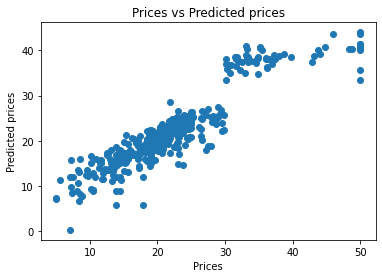

In [ ]:
#시각화

plt.scatter(Y_train, Y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

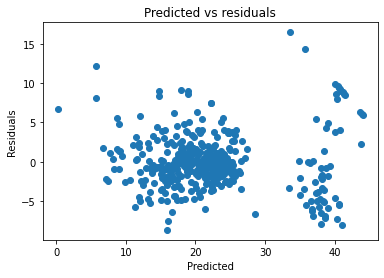

In [ ]:
#residuals체크

plt.scatter(Y_pred,Y_train-Y_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

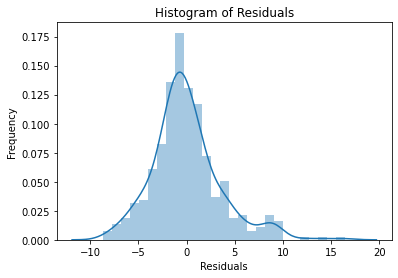

In [ ]:
#Normality 에러 체크

sns.distplot(Y_train-Y_pred)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

In [ ]:
#모델 테스트데이터로 예측

Y_test_pred = lm.predict(X_test)

In [ ]:
# Model Evaluation
acc_linreg = metrics.r2_score(Y_test, Y_test_pred)
print('R^2:', acc_linreg)
print('Adjusted R^2:',1 - (1-metrics.r2_score(Y_test, Y_test_pred))*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(Y_test, Y_test_pred))
print('MSE:',metrics.mean_squared_error(Y_test, Y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(Y_test, Y_test_pred)))

R^2: 0.841838823878611
Adjusted R^2: 0.8163876001349392
MAE: 2.7223374366985587
MSE: 14.691468970110813
RMSE: 3.8329452083366404


모델 평가 스코어가 훈련 데이터와 크게 다르지 않으므로 과적합이 일어나진 않음

####  Random Forest Regressor


In [ ]:
#모델 훈련


from sklearn.ensemble import RandomForestRegressor


reg = RandomForestRegressor()


reg.fit(X_train, Y_train)

RandomForestRegressor()

In [ ]:
#모델 평가
Y_pred = reg.predict(X_train)

In [ ]:
print('R^2:',metrics.r2_score(Y_train, Y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(Y_train, Y_pred))*(len(Y_train)-1)/(len(Y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(Y_train, Y_pred))
print('MSE:',metrics.mean_squared_error(Y_train, Y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(Y_train, Y_pred)))

R^2: 0.987856942873503
Adjusted R^2: 0.9874199176812898
MAE: 0.7439975247524738
MSE: 0.995831339108909
RMSE: 0.9979134927983031


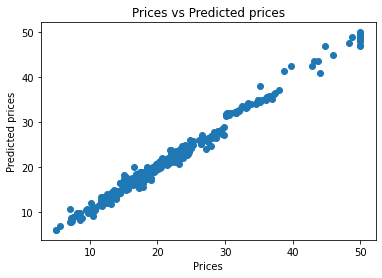

In [ ]:
#시각화

plt.scatter(Y_train, Y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

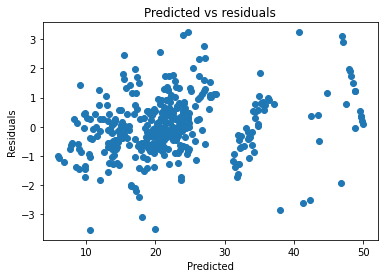

In [ ]:
#Residuals 체크

plt.scatter(Y_pred,Y_train-Y_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

In [ ]:
#For test data

Y_test_pred = reg.predict(X_test)

In [ ]:
acc_rf = metrics.r2_score(Y_test, Y_test_pred)
print('R^2:', acc_rf)
print('Adjusted R^2:',1 - (1-metrics.r2_score(Y_test, Y_test_pred))*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(Y_test, Y_test_pred))
print('MSE:',metrics.mean_squared_error(Y_test, Y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(Y_test, Y_test_pred)))

R^2: 0.9130686062571025
Adjusted R^2: 0.8990796463444524
MAE: 1.9705980392156872
MSE: 8.07498973529413
RMSE: 2.8416526415616197


## XGBoost Regressor



In [ ]:
#모델 학습

from xgboost import XGBRegressor


reg = XGBRegressor()

 
reg.fit(X_train, Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [ ]:
#Model evaluation

Y_pred = reg.predict(X_train)

In [ ]:
print('R^2:',metrics.r2_score(Y_train, Y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(Y_train, Y_pred))*(len(Y_train)-1)/(len(Y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(Y_train, Y_pred))
print('MSE:',metrics.mean_squared_error(Y_train, Y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(Y_train, Y_pred)))

R^2: 0.999996063029937
Adjusted R^2: 0.9999959213394978
MAE: 0.0128183041468706
MSE: 0.0003228641790104422
RMSE: 0.01796842171729176


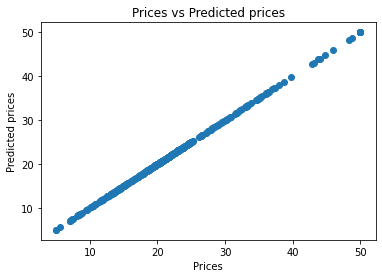

In [ ]:
#시각화

plt.scatter(Y_train, Y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

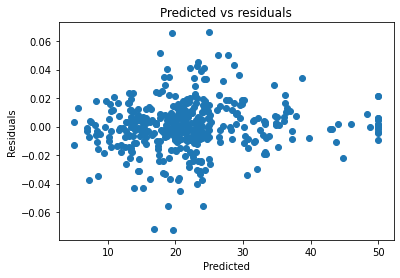

In [ ]:
#check residuals

plt.scatter(Y_pred,Y_train-Y_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

In [ ]:
#For test data

Y_test_pred = reg.predict(X_test)

In [ ]:
acc_xgb = metrics.r2_score(Y_test, Y_test_pred)
print('R^2:', acc_xgb)
print('Adjusted R^2:',1 - (1-metrics.r2_score(Y_test, Y_test_pred))*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(Y_test, Y_test_pred))
print('MSE:',metrics.mean_squared_error(Y_test, Y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(Y_test, Y_test_pred)))

R^2: 0.9062295173286555
Adjusted R^2: 0.8911400143700483
MAE: 2.0422731614580343
MSE: 8.71026740102793
RMSE: 2.951316215017959


### SVM Regressor

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
#데이터 훈련

from sklearn import svm


reg = svm.SVR()

In [ ]:
# Train the model using the training sets 
reg.fit(X_train, Y_train)

SVR()

In [ ]:
#Model Evaluation

Y_pred = reg.predict(X_train)


In [ ]:
print('R^2:',metrics.r2_score(Y_train, Y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(Y_train, Y_pred))*(len(Y_train)-1)/(len(Y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(Y_train, Y_pred))
print('MSE:',metrics.mean_squared_error(Y_train, Y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(Y_train, Y_pred)))

R^2: 0.7224050720761055
Adjusted R^2: 0.7124145091174049
MAE: 2.672957542615028
MSE: 22.765085095505952
RMSE: 4.771277092719092


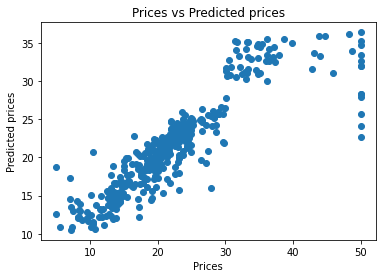

In [ ]:
plt.scatter(Y_train, Y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

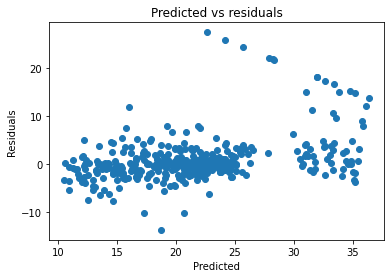

In [ ]:
plt.scatter(Y_pred,Y_train-Y_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

In [ ]:
# Predicting Test data with the model
Y_test_pred = reg.predict(X_test)

In [ ]:
# Model Evaluation
acc_svm = metrics.r2_score(Y_test, Y_test_pred)
print('R^2:', acc_svm)
print('Adjusted R^2:',1 - (1-metrics.r2_score(Y_test, Y_test_pred))*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(Y_test, Y_test_pred))
print('MSE:',metrics.mean_squared_error(Y_test, Y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(Y_test, Y_test_pred)))

R^2: 0.6672922650260079
Adjusted R^2: 0.6137530892830667
MAE: 3.1528502664420013
MSE: 30.9049634325856
RMSE: 5.559223276014879


## 평가한 부분 비교하겠습니다.

In [ ]:
models = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'XGBoost', 'Support Vector Machines'],
    'R-squared Score': [acc_linreg*100, acc_rf*100, acc_xgb*100, acc_svm*100]})
models.sort_values(by='R-squared Score', ascending=False)

,Model,R-squared Score
1,Random Forest,91.31
2,XGBoost,90.62
0,Linear Regression,84.18
3,Support Vector Machines,66.73
